# Stock Price Prediction using RNN

<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/TannerGilbert/Tutorials/blob/master/Keras-Tutorials/5.%20Stock%20Price%20Prediction%20using%20a%20Recurrent%20Neural%20Network/Stock%20Price%20Prediction.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/TannerGilbert/Tutorials/blob/master/Keras-Tutorials/5.%20Stock%20Price%20Prediction%20using%20a%20Recurrent%20Neural%20Network/Stock%20Price%20Prediction.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Recurrent_neural_network_unfold.svg/1920px-Recurrent_neural_network_unfold.svg.png)

### What is Stock Price Prediction?

Stock price prediction is the act of trying to determine the future of a company stock. This can be done by analyzing the past data.

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
import os

### Loading in Dataset

In [6]:
df = pd.read_csv('AAPL_data.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


### Preprocessing and Feature Extraction

In [7]:
df = df['open'].values
df = df.reshape(-1, 1)
print(df.shape)
df[:5]

(1259, 1)


array([[67.7142],
       [68.0714],
       [68.5014],
       [66.7442],
       [66.3599]])

In [8]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
print(dataset_train.shape)
print(dataset_test.shape)

(1007, 1)
(302, 1)


In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.15550899],
       [0.16002875],
       [0.16546966],
       [0.1432353 ],
       [0.13837263]])

In [10]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.7048619 ],
       [0.70865789],
       [0.70043325],
       [0.71080895],
       [0.69518213]])

In [27]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
        print("x_index:", i-50, "y_index:", i)
        print(len(x), df[i-50:i, 0], type(df[i-50:i, 0]))
    x = np.array(x)
    y = np.array(y)
    return x,y 

In [29]:
x_train, y_train = create_dataset(dataset_train)
print(x_train.shape)

x_index: 0 y_index: 50
1 [0.15550899 0.16002875 0.16546966 0.1432353  0.13837263 0.14619996
 0.1321915  0.12602681 0.10489581 0.11077074 0.11908522 0.10095558
 0.10928904 0.10137187 0.09043563 0.07199725 0.06057385 0.08412669
 0.06603248 0.07561229 0.07552245 0.08609681 0.07317274 0.0810899
 0.09030909 0.09667117 0.12929896 0.1255384  0.11252448 0.12040496
 0.13868011 0.14003654 0.12380363 0.11180072 0.09748478 0.07163663
 0.07845043 0.08277153 0.06603248 0.06666515 0.06939446 0.07254007
 0.08269814 0.08347632 0.07055098 0.06073581 0.0583861  0.03076649
 0.         0.00844228] <class 'numpy.ndarray'>
x_index: 1 y_index: 51
2 [0.16002875 0.16546966 0.1432353  0.13837263 0.14619996 0.1321915
 0.12602681 0.10489581 0.11077074 0.11908522 0.10095558 0.10928904
 0.10137187 0.09043563 0.07199725 0.06057385 0.08412669 0.06603248
 0.07561229 0.07552245 0.08609681 0.07317274 0.0810899  0.09030909
 0.09667117 0.12929896 0.1255384  0.11252448 0.12040496 0.13868011
 0.14003654 0.12380363 0.11180072

x_index: 177 y_index: 227
178 [0.25023662 0.23685196 0.2476971  0.2591129  0.25500058 0.2680689
 0.23795406 0.2476971  0.24592564 0.24064795 0.2469379  0.24616099
 0.23789965 0.22886267 0.23864114 0.23444784 0.23504381 0.24373915
 0.25055295 0.24767939 0.23690637 0.23726699 0.2343213  0.2377921
 0.2405037  0.24610658 0.26814103 0.2919482  0.30734853 0.30789135
 0.32090527 0.33383061 0.32143038 0.31259079 0.31743447 0.32361687
 0.31483422 0.316116   0.30196202 0.30338931 0.29234552 0.29198363
 0.28462701 0.32542502 0.32884141 0.32560597 0.31786848 0.30637296
 0.30042591 0.30315523] <class 'numpy.ndarray'>
x_index: 178 y_index: 228
179 [0.23685196 0.2476971  0.2591129  0.25500058 0.2680689  0.23795406
 0.2476971  0.24592564 0.24064795 0.2469379  0.24616099 0.23789965
 0.22886267 0.23864114 0.23444784 0.23504381 0.24373915 0.25055295
 0.24767939 0.23690637 0.23726699 0.2343213  0.2377921  0.2405037
 0.24610658 0.26814103 0.2919482  0.30734853 0.30789135 0.32090527
 0.33383061 0.32143038 0

 0.59300678 0.58680666] <class 'numpy.ndarray'>
x_index: 359 y_index: 409
360 [0.52354019 0.52569125 0.50114386 0.48330271 0.50063773 0.4967152
 0.50607864 0.52651371 0.52417285 0.53644655 0.55555302 0.54429159
 0.52809538 0.49949893 0.51809927 0.50531945 0.49760094 0.49987853
 0.49140082 0.50418065 0.51392369 0.51531555 0.53024644 0.53745881
 0.54492426 0.55656529 0.56959818 0.57124311 0.56770019 0.58668013
 0.58199841 0.57693709 0.58414947 0.60021916 0.60274981 0.60325595
 0.54947944 0.54884678 0.55517343 0.5523897  0.53885068 0.56921858
 0.57934122 0.59958649 0.56150007 0.58010042 0.58845159 0.59300678
 0.58680666 0.57162271] <class 'numpy.ndarray'>
x_index: 360 y_index: 410
361 [0.52569125 0.50114386 0.48330271 0.50063773 0.4967152  0.50607864
 0.52651371 0.52417285 0.53644655 0.55555302 0.54429159 0.52809538
 0.49949893 0.51809927 0.50531945 0.49760094 0.49987853 0.49140082
 0.50418065 0.51392369 0.51531555 0.53024644 0.53745881 0.54492426
 0.55656529 0.56959818 0.57124311 0.56770

 0.91465353 0.9118698 ] <class 'numpy.ndarray'>
x_index: 547 y_index: 597
548 [0.90566969 0.89820424 0.89655932 0.88732241 0.88757548 0.91958831
 0.90554316 0.92211897 0.94982969 0.97285868 1.         0.9456541
 0.91199634 0.89428172 0.93730292 0.92022098 0.90010224 0.87745284
 0.90162063 0.91060447 0.88795508 0.89491439 0.91085754 0.93186201
 0.92313123 0.95236035 0.94362957 0.9445153  0.96387484 0.97652814
 0.94793169 0.9671647  0.95919312 0.95881353 0.94185811 0.95198075
 0.93831519 0.93730292 0.92971095 0.9018737  0.91731072 0.93325387
 0.92066384 0.89428172 0.90604929 0.91478006 0.90857995 0.91465353
 0.9118698  0.91174327] <class 'numpy.ndarray'>
x_index: 548 y_index: 598
549 [0.89820424 0.89655932 0.88732241 0.88757548 0.91958831 0.90554316
 0.92211897 0.94982969 0.97285868 1.         0.9456541  0.91199634
 0.89428172 0.93730292 0.92022098 0.90010224 0.87745284 0.90162063
 0.91060447 0.88795508 0.89491439 0.91085754 0.93186201 0.92313123
 0.95236035 0.94362957 0.9445153  0.96387

 0.64425262 0.63906477] <class 'numpy.ndarray'>
x_index: 735 y_index: 785
736 [0.55099784 0.57099004 0.56807979 0.53821801 0.51594821 0.54391199
 0.50202959 0.52683005 0.54669572 0.58326374 0.563145   0.51392369
 0.48545377 0.49810707 0.5193646  0.50607864 0.50076426 0.51164609
 0.51999727 0.4771026  0.49178042 0.51240529 0.48545377 0.49051509
 0.50101732 0.52189526 0.54935291 0.51341755 0.51734008 0.51847887
 0.4878579  0.51405022 0.52860151 0.52429939 0.53429549 0.57048391
 0.57136964 0.59401904 0.59427211 0.5739003  0.58060655 0.58187188
 0.59237411 0.58819853 0.61413778 0.62236242 0.63387692 0.64425262
 0.63906477 0.63046053] <class 'numpy.ndarray'>
x_index: 736 y_index: 786
737 [0.57099004 0.56807979 0.53821801 0.51594821 0.54391199 0.50202959
 0.52683005 0.54669572 0.58326374 0.563145   0.51392369 0.48545377
 0.49810707 0.5193646  0.50607864 0.50076426 0.51164609 0.51999727
 0.4771026  0.49178042 0.51240529 0.48545377 0.49051509 0.50101732
 0.52189526 0.54935291 0.51341755 0.5173

x_index: 919 y_index: 969
920 [0.72485411 0.72928276 0.73358488 0.73738087 0.74509938 0.75408322
 0.78799405 0.78356539 0.77647955 0.79027164 0.78331233 0.79406763
 0.78230007 0.77736528 0.77673262 0.78040207 0.79115737 0.74509938
 0.75876494 0.73953193 0.7367482  0.73434408 0.70827829 0.70296391
 0.67196334 0.69157594 0.6944862  0.68904528 0.70435577 0.65412219
 0.66158763 0.64716288 0.64880781 0.68815955 0.68702076 0.69208207
 0.7152376  0.70777216 0.7048619  0.70865789 0.70043325 0.71080895
 0.69518213 0.68006144 0.69056368 0.68423703 0.68120024 0.70144551
 0.71979279 0.73219302] <class 'numpy.ndarray'>
x_index: 920 y_index: 970
921 [0.72928276 0.73358488 0.73738087 0.74509938 0.75408322 0.78799405
 0.78356539 0.77647955 0.79027164 0.78331233 0.79406763 0.78230007
 0.77736528 0.77673262 0.78040207 0.79115737 0.74509938 0.75876494
 0.73953193 0.7367482  0.73434408 0.70827829 0.70296391 0.67196334
 0.69157594 0.6944862  0.68904528 0.70435577 0.65412219 0.66158763
 0.64716288 0.6488078

In [18]:
x_test, y_test = create_dataset(dataset_test)
# x_test[:1]

x_index: 0 y_index: 50
x_index: 1 y_index: 51
x_index: 2 y_index: 52
x_index: 3 y_index: 53
x_index: 4 y_index: 54
x_index: 5 y_index: 55
x_index: 6 y_index: 56
x_index: 7 y_index: 57
x_index: 8 y_index: 58
x_index: 9 y_index: 59
x_index: 10 y_index: 60
x_index: 11 y_index: 61
x_index: 12 y_index: 62
x_index: 13 y_index: 63
x_index: 14 y_index: 64
x_index: 15 y_index: 65
x_index: 16 y_index: 66
x_index: 17 y_index: 67
x_index: 18 y_index: 68
x_index: 19 y_index: 69
x_index: 20 y_index: 70
x_index: 21 y_index: 71
x_index: 22 y_index: 72
x_index: 23 y_index: 73
x_index: 24 y_index: 74
x_index: 25 y_index: 75
x_index: 26 y_index: 76
x_index: 27 y_index: 77
x_index: 28 y_index: 78
x_index: 29 y_index: 79
x_index: 30 y_index: 80
x_index: 31 y_index: 81
x_index: 32 y_index: 82
x_index: 33 y_index: 83
x_index: 34 y_index: 84
x_index: 35 y_index: 85
x_index: 36 y_index: 86
x_index: 37 y_index: 87
x_index: 38 y_index: 88
x_index: 39 y_index: 89
x_index: 40 y_index: 90
x_index: 41 y_index: 91
x_

In [19]:
# Reshape features for LSTM Layer
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_train.shape)
print(x_test.shape)

(957, 50, 1)
(252, 50, 1)


### Building Model

In [11]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [12]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [13]:
if(not os.path.exists('stock_prediction.h5')):
    model.fit(x_train, y_train, epochs=50, batch_size=32)
    model.save('stock_prediction.h5')

In [14]:
model = load_model('stock_prediction.h5')

### Visualizing Results

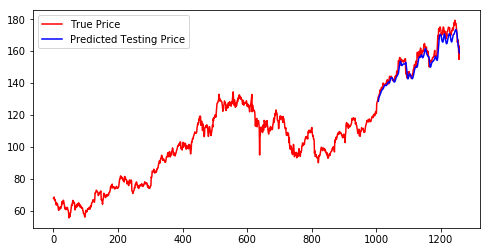

In [15]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red',  label="True Price")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()

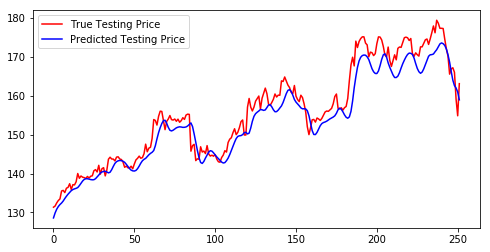

In [16]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.plot(predictions, color='blue', label='Predicted Testing Price')
plt.legend()

In [17]:
x = x_test[-1]
num_timesteps = 100
preds = []
for i in range(num_timesteps):
    data = np.expand_dims(x, axis=0)
    prediction = model.predict(data)
    prediction = scaler.inverse_transform(prediction)
    preds.append(prediction[0][0])
    x = np.delete(x, 0, axis=0) # delete first row
    x = np.vstack([x, prediction]) # add prediction

print(preds)

[158.93146, 264.7039, 322.72485, 338.33698, 344.51175, 346.56482, 347.41708, 347.84174, 348.11456, 348.32028, 348.48422, 348.61807, 348.7292, 348.822, 348.90002, 348.9662, 349.02246, 349.0703, 349.11133, 349.14648, 349.17664, 349.20248, 349.22473, 349.2437, 349.26013, 349.2741, 349.28613, 349.29666, 349.30576, 349.31372, 349.32074, 349.32672, 349.332, 349.33603, 349.339, 349.3408, 349.34155, 349.34195, 349.3431, 349.34628, 349.3531, 349.36417, 349.3784, 349.39267, 349.4014, 349.3969, 349.37064, 349.31384, 349.22308, 349.10657, 348.96777, 348.96805, 348.9681, 348.9682, 348.96823, 348.96826, 348.96826, 348.96835, 348.96832, 348.96832, 348.96832, 348.96832, 348.96832, 348.96835, 348.96835, 348.96832, 348.96832, 348.96832, 348.96835, 348.96835, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.968

## Resources

<ul>
    <li><a href="https://en.wikipedia.org/wiki/Stock_market_prediction">Stock market prediction (Wikipedia)</a></li>
    <li><a href="https://towardsdatascience.com/stock-prediction-in-python-b66555171a2">Stock Prediction in Python (William Koehrsen on Medium)</a></li>
    <li><a href="https://github.com/topics/stock-price-prediction?l=python">Stock Price Prediction (Github Respositorys)</a></li>
    <li><a href="https://programmingwithgilbert.firebaseapp.com/videos/machine-learning-explained/recurrent-neural-networks-lstm-explained">Recurrent Neural Networks / LSTM Explained (my own video)</a></li>
</ul>